<a href="https://colab.research.google.com/github/EmersuCC/Binary-Tree-/blob/master/IA_EMERSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 3
###Pré-processamento, matriz e KNN


In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import seaborn as sns

## 3.1 e 3.2

In [25]:

df = pd.read_csv('/data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [4]:
df.shape 


(294, 14)

In [ ]:
#Colunas e Tipos
df.columns
#df.dtypes


In [6]:
df = df.rename(columns={"num       ":"target"})

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    float64
 4   chol        271 non-null    float64
 5   fbs         286 non-null    float64
 6   restecg     293 non-null    float64
 7   thalach     293 non-null    float64
 8   exang       293 non-null    float64
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    float64
 11  ca          3 non-null      float64
 12  thal        28 non-null     float64
 13  num         294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [7]:
corr = df.corr()
corr.style.background_gradient(cmap = 'plasma') #mapa de correlação

,age,sex,cp,oldpeak,target
age,1.000000,0.013618,0.145826,0.177707,0.159315
sex,0.013618,1.000000,0.249875,0.118931,0.272781
cp,0.145826,0.249875,1.000000,0.353109,0.505864
oldpeak,0.177707,0.118931,0.353109,1.000000,0.545700
target,0.159315,0.272781,0.505864,0.545700,1.000000


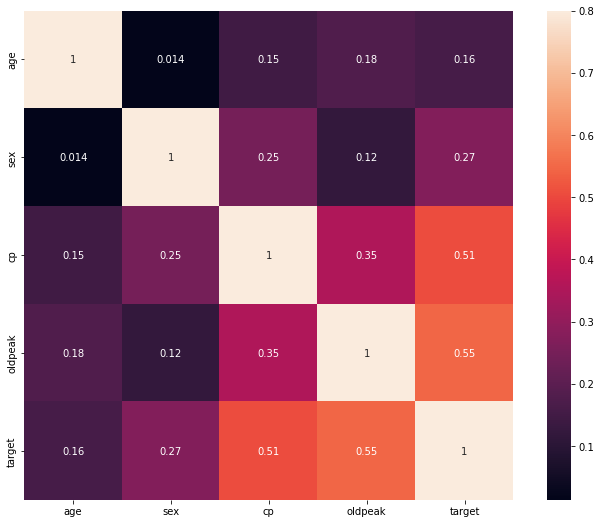

In [8]:
#Correlação entre os atributos, parte questão 3.2

corr = df.corr()
f, ax = plt.subplots(figsize=(12,9))
#corr.style.background_gradient(cmap = 'plasma') #mapa de correlação
sns.heatmap(corr, vmax=.8, square=True, annot=True)

 ***Dores no peito (cp) e a depressão do segmento ST induzida pelo exercício em relação ao repouso (oldpeak) possuem maior correlação com o diagnóstico de ataque cardíaco(target). Posteriormente serão descartados os atributos com correlação menor que 0.3***

###Parte questão 3.1, pré-processamento

In [9]:
df.values

array([[28, 1, 2, ..., '?', '?', 0],
       [29, 1, 2, ..., '?', '?', 0],
       [29, 1, 2, ..., '?', '?', 0],
       ...,
       [56, 1, 4, ..., '?', '?', 1],
       [58, 0, 2, ..., '?', '7', 1],
       [65, 1, 4, ..., '?', '?', 1]], dtype=object)

In [11]:

#Substituindo valores atribuidos com '?'
df = df.replace('?', None)
df = df.replace('?', 0)


In [ ]:
print(df.isnull().sum())


In [ ]:
#Removendo a coluna de dados ca pois não possui nenhuma informação relevante
print(df['ca'].unique())
df = df.drop('ca', 1)

In [ ]:
#Este Scaler remove a mediana e dimensiona os dados de acordo com o intervalo quantil
rc = RobustScaler()
colunas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df[colunas] = rc.fit_transform(df[colunas])
df.head()

In [ ]:
#Escalando os outros atributos com StandardScaler, ele padroniza os recursos removendo a média e dimensionando para a variação da unidade
sc = StandardScaler()
colunas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  
df[colunas] = sc.fit_transform(df[colunas])

df.head()

In [16]:
#Cálculos das correlações com atributo alvo
print("Correlações com o atributo alvo: ")
corr = df.drop("target", axis=1).apply(lambda x: x.corr(df['target']))
print(corr)


Correlações com o atributo alvo: 
age         0.159315
sex         0.272781
cp          0.505864
trestbps    0.138462
chol        0.228496
fbs         0.162869
restecg    -0.031988
thalach    -0.329337
exang       0.577166
oldpeak     0.545700
slope       0.344463
thal        0.467994
dtype: float64


In [17]:
# Remoção de atributos com correlação < 0.3
low_attrs = [key for key in corr.keys() if abs(corr[key]) < 0.3]
print(low_attrs)
for attr in low_attrs:
    df = df.drop(attr, axis=1)

['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg']


In [ ]:
#PCA
pca = PCA(n_components=7)
pca.fit(df)
pca.components_

In [ ]:
#Amostra aleatoria com 10 pacientes que não possuem risco de ataque
a = df.loc[df['target'] == 0].sample(n=10, random_state = 2) 
a

In [ ]:
df.dropna(how = 'any') #elimina todas as linhas com dados ausentes
df

In [ ]:
#Excluindo valores duplicados
df.drop_duplicates()

In [ ]:
#Normalização dos dados.
df = (df-df.min())/(df.max()-df.min())
df

####Questão 3.3
KNN


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, neighbors, svm, metrics, preprocessing
from sklearn.metrics import classification_report

In [23]:
#Splits

trainSample = df.sample(frac=0.8, random_state = 1) #seleção de 80% da base para treinamento
testSample = pd.concat([df, trainSample]).drop_duplicates(keep=False) #concatena a base original com a base de treinamento e exclui os duplicados, sobrando a amostra de teste

trainTarget = trainSample["target"] #define o atributo alvo da base para o treinamento
testTarget = testSample["target"] #define o atributo alvo da base para o teste


del testSample["target"]
del trainSample["target"]



K-NN
Acurácia: 0.92


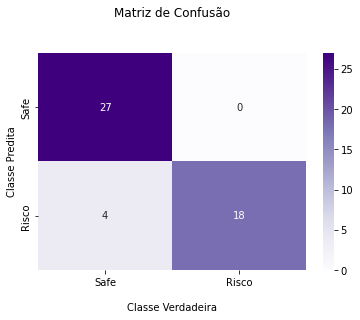

In [24]:
import random
#Para K = 3 acurácia = 92%
#Usar k para valores aleatorios entre 1 e 235 
#k = random.randint(1,235)
#print('o valor de k gerado foi: ', k)
knn = neighbors.KNeighborsClassifier(n_neighbors=3, algorithm="auto")
knn.fit(trainSample, trainTarget)
resultKNN = knn.predict(testSample)

print('\nK-NN')
print('Acurácia: %0.2f' % (metrics.accuracy_score(testTarget, resultKNN)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultKNN)

ax = sns.heatmap(matrizConfusao, annot=True, cmap='Purples')

ax.set_title('Matriz de Confusão\n\n');
ax.set_xlabel('\nClasse Verdadeira')
ax.set_ylabel('Classe Predita');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Safe','Risco'])
ax.yaxis.set_ticklabels(['Safe','Risco'])


## Display the visualization of the Confusion Matrix.
plt.show()

#print("Matriz de confusão:\n", matrizConfusao)

In [ ]:
#Métricas

VP = np.diag(matrizConfusao)
FP = matrizConfusao.sum(axis=1) - np.diag(matrizConfusao)
FN = matrizConfusao.sum(axis=0) - np.diag(matrizConfusao)
VN = matrizConfusao.sum() - (FP+FN+VP)

print(f'Matriz de Confusão para K = 3\n', matrizConfusao)
print('\n')

#Sensibilidade = VP / (VP + FN)
S = VP / (VP+FN)
print(f'Sensibilidade: {S.mean():.2f}')

#Acurácia = (VP+VN)/(VP+VN+FP+FN)
Acc = (VP+VN)/(VP+FP+VN+FN)
print(f'Acurácia: {Acc.mean():.2f}')

#Precisão = VP / (VP+FP)
P = VP / (VP+FP)
print(f'Precisão: {P.mean():.2f}')

#F1 = 2* (P*S / P+S) Medidada de confiabilidade da acurácia
MedidaF1 = (2*P*S)/(P+S)
print(f'Medida F1: {MedidaF1.mean():.2f}')

Matriz de Confusão para K = 3
 [[27  0]
 [ 4 18]]


Sensibilidade: 0.94
Acurácia: 0.92
Precisão: 0.91
Medida F1: 0.92


Matriz e métricas para K = 3

Matriz de Confusão para K = 3
 [[27  0]
 [ 4 18]]


Sensibilidade: 0.94
Acurácia: 0.92
Precisão: 0.91
Medida F1: 0.92


Matriz e métrica para K = 2

Matriz de Confusão para K = 2
 [[27  0]
 [ 7 15]]


Sensibilidade: 0.90
Acurácia: 0.86
Precisão: 0.84
Medida F1: 0.85


Matriz e métrica para K = 9

Matriz de Confusão para K = 9
 [[27  0]
 [ 5 17]]


Sensibilidade: 0.92
Acurácia: 0.90
Precisão: 0.89
Medida F1: 0.89


Matriz e Métricas para K = 10

Matriz de Confusão para K = 10
 [[27  0]
 [ 5 17]]


Sensibilidade: 0.92
Acurácia: 0.90
Precisão: 0.89
Medida F1: 0.89


Matriz e métricas para K = 100

Matriz de Confusão para K = 100
 [[26  1]
 [10 12]]


Sensibilidade: 0.82
Acurácia: 0.78
Precisão: 0.75
Medida F1: 0.76


#####*Questão* 3.4: **métricas de Similaridade**

Valor de k:  3

K-NN
Acurácia: 0.92


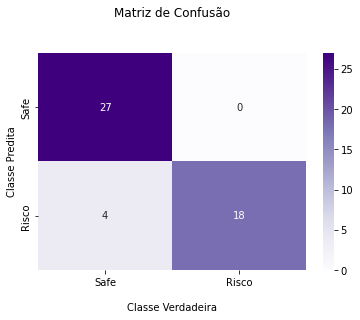

In [ ]:
#Distância Euclidiana
#Diantância de Manhattan
#Valores de K = 2,3,9,10,100

#k = random.randint(1,235)
#print('valor gerado para k: ', k)
k = 3
print('Valor de k: ', k)
knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(trainSample, trainTarget)
resultKNN = knn.predict(testSample)

print('\nK-NN')
print('Acurácia: %0.2f' % (metrics.accuracy_score(testTarget, resultKNN)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultKNN)

ax = sns.heatmap(matrizConfusao, annot=True, cmap='Purples')

ax.set_title('Matriz de Confusão\n\n');
ax.set_xlabel('\nClasse Verdadeira')
ax.set_ylabel('Classe Predita');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Safe','Risco'])
ax.yaxis.set_ticklabels(['Safe','Risco'])


## Display the visualization of the Confusion Matrix.
plt.show()

#print("Matriz de confusão:\n", matrizConfusao)




In [ ]:
#Métricas

VP = np.diag(matrizConfusao)
FP = matrizConfusao.sum(axis=1) - np.diag(matrizConfusao)
FN = matrizConfusao.sum(axis=0) - np.diag(matrizConfusao)
VN = matrizConfusao.sum() - (FP+FN+VP)
print(f'Matriz de Confusão para K = {k}\n', matrizConfusao)
print('\n')

S = VP / (VP+FN)
print(f'Sensibilidade: {S.mean():.2f}')

Acc = (VP+VN)/(VP+FP+VN+FN)
print(f'Acurácia: {Acc.mean():.2f}')

P = VP / (VP+FP)
print(f'Precisão: {P.mean():.2f}')
#F1 = 2* (P*S / P+S) Medidada de confiabilidade da acurácia
MedidaF1 = (2*P*S)/(P+S)
print(f'Medida F1: {MedidaF1.mean():.2f}')

Matriz de Confusão para K = 3
 [[27  0]
 [ 4 18]]


Sensibilidade: 0.94
Acurácia: 0.92
Precisão: 0.91
Medida F1: 0.92


######Questão 3.4 - Os resultados abaixo foram cálculados separadamente com os devidos parametros[splits, metricas] acima.

In [ ]:
# K=2 : MÉTRICA = Manhattan

Matriz de Confusão para K = 2
 
 Manhattan 
 
 [[27  0]
 [ 9 13]]


Sensibilidade: 0.88
Acurácia: 0.82
Precisão: 0.80
Medida F1: 0.80


In [ ]:
# K=2 : MÉTRICA = EUCLIDEAN

Matriz de Confusão para K = 2
 
 Euclidean 
 
 [[27  0]
 [ 7 15]]


Sensibilidade: 0.90
Acurácia: 0.86
Precisão: 0.84
Medida F1: 0.85


In [ ]:
# K=3 : MÉTRICA = MANHATTAN

Matriz de Confusão para K = 3
 
 Manhattan 
 
 [[27  0]
 [ 6 16]]


Sensibilidade: 0.91
Acurácia: 0.88
Precisão: 0.86
Medida F1: 0.87


In [ ]:
# K=3 : MÉTRICA = EUCLIDEAN

Matriz de Confusão para K = 3
 
 Euclidean 
 
 [[27  0]
 [ 4 18]]


Sensibilidade: 0.94
Acurácia: 0.92
Precisão: 0.91
Medida F1: 0.92


In [ ]:
# K=9 : MÉTRICA = MANHATTAN

Matriz de Confusão para K = 9
 
 Manhattan 
 
 [[27  0]
 [ 4 18]]


Sensibilidade: 0.94
Acurácia: 0.92
Precisão: 0.91
Medida F1: 0.92


In [ ]:
# K=9 : MÉTRICA = EUCLIDEAN

Matriz de Confusão para K = 9
 
 Euclidean 
 
 [[27  0]
 [ 5 17]]


Sensibilidade: 0.92
Acurácia: 0.90
Precisão: 0.89
Medida F1: 0.89


In [ ]:
# K=10 : MÉTRICA = MANHATTAN

Matriz de Confusão para K = 10
 
 Manhattan 
 
 [[27  0]
 [ 5 17]]


Sensibilidade: 0.92
Acurácia: 0.90
Precisão: 0.89
Medida F1: 0.89


In [ ]:
# K=10 : MÉTRICA = EUCLIDEAN

Matriz de Confusão para K = 10
 
 Euclidean 
 
 [[27  0]
 [ 5 17]]


Sensibilidade: 0.92
Acurácia: 0.90
Precisão: 0.89
Medida F1: 0.89


In [ ]:
# K=100 : MÉTRICA = MANHATTAN

Matriz de Confusão para K = 100
 
 Manhattan 
 
 [[26  1]
 [10 12]]


Sensibilidade: 0.82
Acurácia: 0.78
Precisão: 0.75
Medida F1: 0.76


In [ ]:
# K=100 : MÉTRICA = EUCLIDEAN

Matriz de Confusão para K = 100
 
 Euclidean 
 
 [[26  1]
 [10 12]]


Sensibilidade: 0.82
Acurácia: 0.78
Precisão: 0.75
Medida F1: 0.76


In [ ]:
# K=155 : MÉTRICA = MANHATTAN

Matriz de Confusão para K = 155
 
 Manhattan 
 
 [[27  0]
 [18  4]]


Sensibilidade: 0.80
Acurácia: 0.63
Precisão: 0.59
Medida F1: 0.53


In [ ]:
# K=155 : MÉTRICA = EUCLIDEAN

Matriz de Confusão para K = 155
 
 Euclidean 
 
 [[27  0]
 [22  0]]


Sensibilidade: nan
Acurácia: 0.55
Precisão: 0.50
Medida F1: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


####**3.5 - Melhor K = 3, Melhor distancia = Euclidean**

In [ ]:

#Conjunto, Melhor K, Métricas e Matriz
print(df.head())
print('\n\n')

VP = np.diag(matrizConfusao)
FP = matrizConfusao.sum(axis=1) - np.diag(matrizConfusao)
FN = matrizConfusao.sum(axis=0) - np.diag(matrizConfusao)
VN = matrizConfusao.sum() - (FP+FN+VP)
print(f'Matriz de Confusão para K = {k}\n \n Euclidean \n \n', matrizConfusao)
print('\n')

S = VP / (VP+FN)
print(f'Sensibilidade: {S.mean():.2f}')

Acc = (VP+VN)/(VP+FP+VN+FN)
print(f'Acurácia: {Acc.mean():.2f}')

P = VP / (VP+FP)
print(f'Precisão: {P.mean():.2f}')
#F1 = 2* (P*S / P+S) Medidada de confiabilidade da acurácia
MedidaF1 = (2*P*S)/(P+S)
print(f'Medida F1: {MedidaF1.mean():.2f}')

         cp   thalach  exang  oldpeak  slope      thal  target
0  0.333333  0.953704    0.0      0.0    0.0  0.000000     0.0
1  0.333333  0.722222    0.0      0.0    0.0  0.000000     0.0
2  0.333333  0.814815    0.0      0.0    0.0  0.000000     0.0
3  0.000000  0.814815    0.0      0.0    0.0  0.857143     0.0
4  0.333333  0.629630    0.0      0.0    0.0  0.857143     0.0



Matriz de Confusão para K = 3
 
 Euclidean 
 
 [[27  0]
 [ 4 18]]


Sensibilidade: 0.94
Acurácia: 0.92
Precisão: 0.91
Medida F1: 0.92


#Questão 4


In [28]:
#Criação da matriz

p4 = np.array([[70,20,5,5], [10,67,3,20], [5,30,55,10], [5,4,2,1000]])
p4

array([[  70,   20,    5,    5],
       [  10,   67,    3,   20],
       [   5,   30,   55,   10],
       [   5,    4,    2, 1000]])

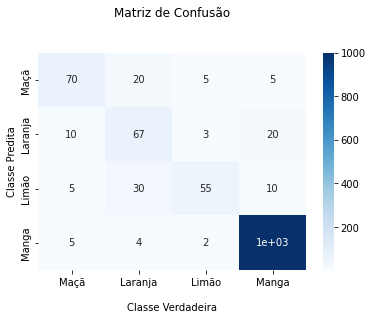

In [29]:
#Plotagem da matriz com mapa de calor do Seaborn
#Esse código foi puramente copiado do Stackoverflow 

ax = sns.heatmap(p4, annot=True, cmap='Blues')

ax.set_title('Matriz de Confusão\n\n');
ax.set_xlabel('\nClasse Verdadeira')
ax.set_ylabel('Classe Predita');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Maçã','Laranja','Limão', 'Manga'])
ax.yaxis.set_ticklabels(['Maçã','Laranja', 'Limão', 'Manga'])

## Display the visualization of the Confusion Matrix.
plt.show()

###Métricas



In [30]:
VP = np.diag(p4)
print(VP)

FP = p4.sum(axis=1) - np.diag(p4)
print(FP)

FN = p4.sum(axis=0) - np.diag(p4)
print(FN)

VN = p4.sum() - (FP+FN+VP)
print(VN)


[  70   67   55 1000]
[30 33 45 11]
[20 54 10 35]
[1191 1157 1201  265]


In [31]:
#Sensibilidade = VP / (VP + FN)
S = VP / (VP+FN)
#print(S, '\n')
S.mean()


0.7859585517688285

In [32]:
#Especificidade = VN / (VN/FP)

E = VN / (VN+FP)  #VN = 0
E.mean()

0.9679320601764494

In [33]:
#Precisão = VP / (VP+FP)

P = VP / (VP+FP)
P.mean()

0.7272799208704254

In [34]:
#Acurácia = (VP+VN)/(VP+VN+FP+FN)

Acc = (VP+VN)/(VP+FP+VN+FN)
Acc.mean()

0.9546147978642258

In [35]:
#F1 = 2* (P*S / P+S) Medidada de confiabilidade da acurácia

MedidaF1 = (2*P*S)/(P+S)
MedidaF1.mean()

0.7468401800270371

In [36]:
#Coeficiente de Matthews = (VP*VN – FP*FN) / sqrt((VP + FP)*(VP + FN)*(VN + FP)*(VN + FN))

CM = (VP*VN - FP*FN) / np.sqrt((VP + FP)*(VP + FN)*(VN + FP)*(VN + FN))
CM.mean()

0.7131197999274905

In [ ]:
#Reference: https://stats.stackexchange.com/questions/372236/what-is-the-formula-to-calculate-the-area-under-the-roc-curve-from-a-contingency
AUC = (S + E)/2
AUC.mean()

0.8769453059726389

In [ ]:
#Valores com 3 dígitos de precisão
print(f'Sensibilidade: {S.mean():.3f}')
print(f'Especificidade: {E.mean():.3f}')
print(f'Precisão: {P.mean():.3f}')
print(f'Acurácia: {Acc.mean():.3f}')
print(f'MedidaF1: {MedidaF1.mean():.3f}')
print(f'Coeficiente de Matthews: {CM.mean():.3f}')
print(f'AUC: {AUC.mean():.3f}')

Sensibilidade: 0.786
Especificidade: 0.968
Precisão: 0.727
Acurácia: 0.955
MedidaF1: 0.747
Coeficiente de Matthews: 0.713
AUC: 0.877


In [ ]:
#Valores com 2 dígitos de precisão

print(f'Sensibilidade: {S.mean():.2f}')
print(f'Especificidade: {E.mean():.2f}')
print(f'Precisão: {P.mean():.2f}')
print(f'Acurácia: {Acc.mean():.2f}')
print(f'MedidaF1: {MedidaF1.mean():.2f}')
print(f'Coeficiente de Matthews: {CM.mean():.2f}')
print(f'AUC: {AUC.mean():.2f}')


Sensibilidade: 0.79
Especificidade: 0.97
Precisão: 0.73
Acurácia: 0.95
MedidaF1: 0.75
Coeficiente de Matthews: 0.71
AUC: 0.88


In [ ]:
tpr = VP/(VP+FN)
fpr = FP/(FP+VN)
x = (0, tpr, 1)
y = (0, fpr, 1)

auc = np.trapz(x,y)
auc
